In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st

In [4]:
sns.set_theme()

# Experiment in Petri dishes

In [5]:
sheet_id = '1aCfAOkr_9d6sLyf8hqB59XtaWXvl1tcmj3cAfE9zUdg'
sheet_name = 'dish_data_for_stat'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
dish = pd.read_csv(url)

In [3]:
dish

,group,temp,mutagen,repeat,alive,all,hatching_perc,nutrition,nutrition_perc
0,25c,25,c,1,17,33,"51,515152",15,"45,454545"
1,25c,25,c,2,17,34,"50,000000",13,"38,235294"
2,25c,25,c,3,6,31,"19,354839",4,"12,903226"
3,25c,25,c,4,15,29,"51,724138",15,"51,724138"
4,26c,26,c,1,22,30,"73,333333",20,"66,666667"
5,26c,26,c,2,2,30,"6,666667",2,"6,666667"
6,26c,26,c,3,14,30,"46,666667",13,"43,333333"
7,26c,26,c,4,20,29,"68,965517",18,"62,068966"
8,25m,25,m,1,8,18,"44,444444",2,"11,111111"
9,25m,25,m,2,7,17,"41,176471",7,"41,176471"


In [6]:
dish['hatching_perc'] = dish['hatching_perc'].str.replace(',', '.').astype('float')
dish['nutrition_perc'] = dish['nutrition_perc'].str.replace(',', '.').astype('float')

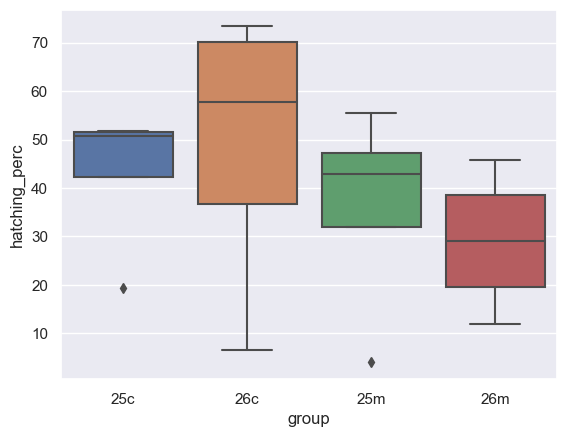

In [17]:
sns.boxplot(dish, x='group', y='hatching_perc');

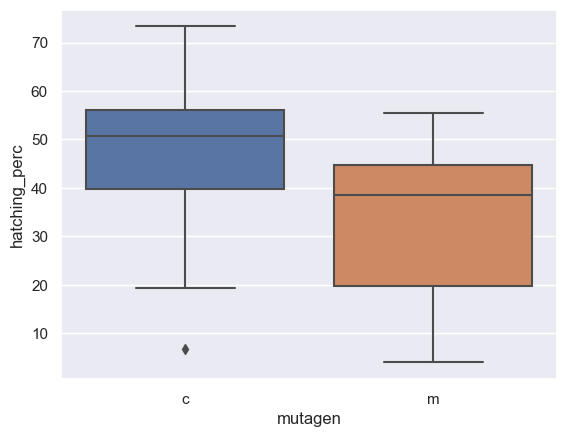

In [9]:
sns.boxplot(dish, x='mutagen', y='hatching_perc');

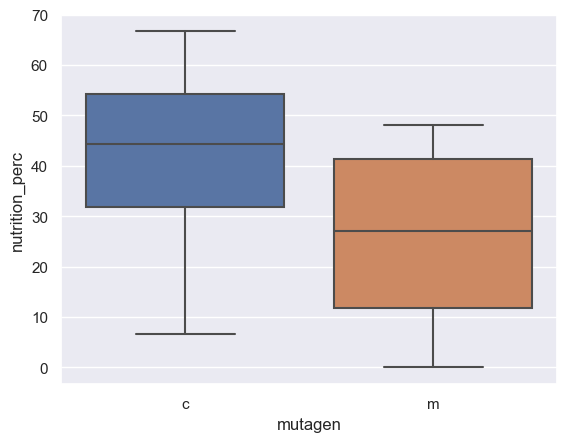

In [8]:
sns.boxplot(dish, x='mutagen', y='nutrition_perc');

In [23]:
model = ols('hatching_perc ~ temp + mutagen + temp:mutagen', data=dish).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
mutagen,715.486091,1.0,1.501977,0.243877
temp,2.312575,1.0,0.004855,0.945600
temp:mutagen,170.034891,1.0,0.356944,0.561313
Residual,5716.355295,12.0,NaN,NaN


In [28]:
st.mannwhitneyu(dish[dish['mutagen'] == 'c']['hatching_perc'], dish[dish['mutagen'] == 'm']['hatching_perc'])

MannwhitneyuResult(statistic=47.0, pvalue=0.13038073038073036)

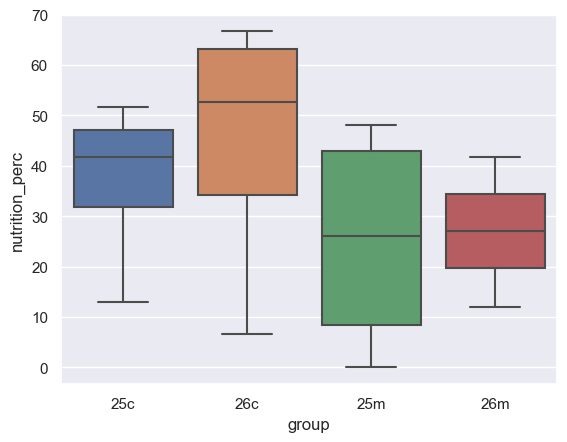

In [18]:
sns.boxplot(dish, x='group', y='nutrition_perc');

In [25]:
model = ols('nutrition_perc ~ temp + mutagen + temp:mutagen', data=dish).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
mutagen,881.024344,1.0,2.030651,0.179641
temp,89.641078,1.0,0.206612,0.657549
temp:mutagen,32.962730,1.0,0.075975,0.787517
Residual,5206.355425,12.0,NaN,NaN


In [29]:
st.mannwhitneyu(dish[dish['mutagen'] == 'c']['nutrition_perc'], dish[dish['mutagen'] == 'm']['nutrition_perc'])

MannwhitneyuResult(statistic=47.0, pvalue=0.13038073038073036)

# Experiment in Weiss

In [33]:
sheet_id = '1aCfAOkr_9d6sLyf8hqB59XtaWXvl1tcmj3cAfE9zUdg'
sheet_name = 'weiss_data_for_stat'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
weiss = pd.read_csv(url)

In [34]:
weiss

,group,mutagen,all,alive_after_selection,alive_after_hatching,hatching_perc,nutrition_perc
0,control,c,715,620,536,"86,71328671","74,96503497"
1,mutagen,m,621,564,312,"90,82125604","50,24154589"
2,control_after_shock,c,182,167,102,"91,75824176","56,04395604"
3,mutagen_after_shock,m,527,448,330,"85,00948767","62,61859583"


In [35]:
weiss['hatching_perc'] = weiss['hatching_perc'].str.replace(',', '.').astype('float')
weiss['nutrition_perc'] = weiss['nutrition_perc'].str.replace(',', '.').astype('float')

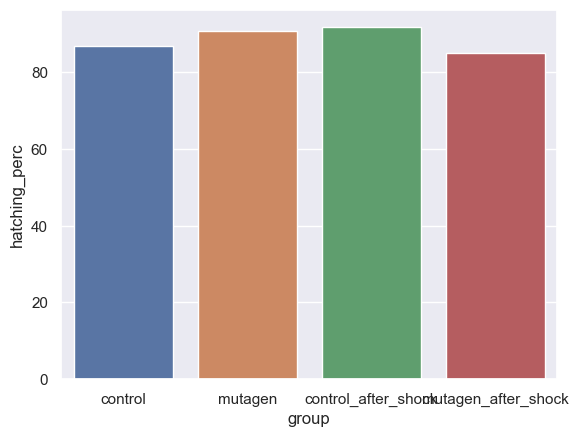

In [39]:
sns.barplot(weiss, x='group', y='hatching_perc');

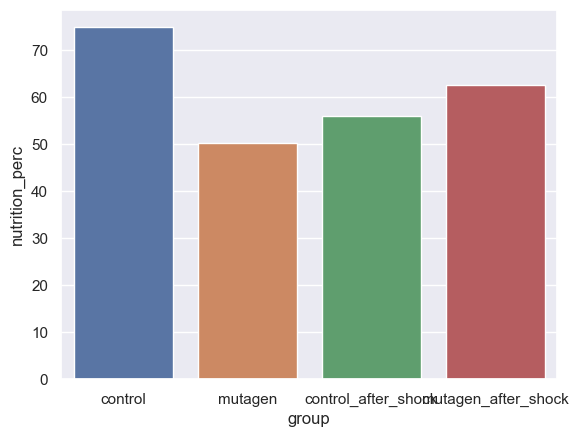

In [41]:
sns.barplot(weiss, x='group', y='nutrition_perc');